**PART 1**

Installing beautiful Soup

In [149]:
pip install bs4

Importing the necessary functions

In [150]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Storing the url as a variable and passing a request to it. Storing the response as a variable and using BeautifulSoup on its content to get process the html.

Checked the website and found the class name of the required table. Searched it here through beautiful soup and stored the table in a variable.

Iterated through each row and each column of the row and stored each value in a list. Appended the list to a big master list to get the list of lists of the final data and stored it as a dataframe using pandas.

The 0th index was unnecessary, so dropped it.

In [151]:
url = 'https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html'

r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
solar_flare_table = soup.find('table', class_='table table-striped table-responsive-md')
solar_flare_list = []
for row in solar_flare_table.find_all('tr'):
  row_data = []
  for column in row.find_all('td'):
    #print(column.text)
    row_data.append(column.text)
  solar_flare_list.append(row_data)
custom_index = ['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie']
solar_flare_df = pd.DataFrame(solar_flare_list, columns = custom_index)
solar_flare_df = solar_flare_df.drop(0)

In [152]:
solar_flare_df.shape

(50, 8)

Unnecessary column 'movie' was removed

In [153]:
del solar_flare_df['movie']

In [154]:
solar_flare_df

,rank,x_class,date,region,start_time,max_time,end_time
1,1,X28+,2003/11/04,0486,19:29,19:53,20:06
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03
3,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24
4,4,X17+,2005/09/07,0808,17:17,17:40,18:03
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
6,6,X10,2003/10/29,0486,20:37,20:49,21:01
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
9,9,X9,2006/12/05,0930,10:18,10:35,10:45
10,10,X8.3,2003/11/02,0486,17:03,17:25,17:39


Merging the date and time columns and converting them in DateTime format.

The old columns are then deleted.

In [155]:
solar_flare_df['start_datetime'] = pd.to_datetime(solar_flare_df['date'] + ' ' + solar_flare_df['start_time'])
solar_flare_df['max_datetime'] = pd.to_datetime(solar_flare_df['date'] + ' ' + solar_flare_df['max_time'])
solar_flare_df['end_datetime'] = pd.to_datetime(solar_flare_df['date'] + ' ' + solar_flare_df['end_time'])
del solar_flare_df['date']
del solar_flare_df['start_time']
del solar_flare_df['max_time']
del solar_flare_df['end_time']

Rearranging the columns

In [156]:
solar_flare_df = solar_flare_df[['rank',	'x_class', 'start_datetime',	'max_datetime',	'end_datetime',	'region']]

In [157]:
solar_flare_df

,rank,x_class,start_datetime,max_datetime,end_datetime,region
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


Checking for missing values.

As there are no missing values, no further action is required.


In [158]:
missing_values = solar_flare_df.isna()

In [159]:
True in missing_values

False

Sending a request to the NASA website and storing its response as a variable and using BeautifulSoup on it

In [160]:
url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

As the data in the NASA website is not in a table but completely in a string format, We split the text on the basis of the '\n' delimeter which implies there is a new line after that point. This lets us separate the rows.

In [161]:
lines = []
for item in soup.text.split('\n'):
  lines.append(item)

The first 0-15 rows were unnecessary, so we only store the ones that come after that.

In [162]:
lines = soup.text.split('\n')[16:]

Each element in the variable 'lines' is a big string, even though they represent different columns. So we access each line seaprately and use the split() function to separate the elements whenever there is one or more space encountered. This data is then stored in another variable which finally becomes the basis for forming the dataframe.

In [163]:
lines2 = []
for line in lines:
  lines2.append(line.split())

In [164]:
df = pd.DataFrame(lines2)

In [165]:
df.iloc[525]

0     ==============================================...
1                                                  None
2                                                  None
3                                                  None
4                                                  None
5                                                  None
6                                                  None
7                                                  None
8                                                  None
9                                                  None
10                                                 None
11                                                 None
12                                                 None
13                                                 None
14                                                 None
15                                                 None
16                                                 None
17                                              

Rows 1 and 2 contained categories of the columns which are added to the column name further in the code. Hence, it is uneccessary. Row 525 only contained 'None' values. There are more such rows and a generalised solution is implemented.

In [166]:
df = df.drop([1,2,525])

Removing all the unnecessary columns.

In [167]:
df = df.iloc[:, 0:14]

In [168]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Start,End,Frequency,Loc,NOAA,Imp,Date,Time,CPA,Width,Spd,None,None,None
3,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
4,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
5,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
6,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692
523,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,Halo,360,2077
524,2020/12/07,16:18,12/08,02:00,14000,160,S25W08,12790,C7.4,12/07,16:24,Halo,360,1407
526,None,None,None,None,None,None,None,None,None,None,None,None,None,None


The following code checks with a row has no value for all columns. It returns true when it finds such a column. So we update the dataframe to the same dataframe without those specific columns.

In [169]:
rows_with_no_value = df.isna().all(axis=1)

In [170]:
rows_with_no_value

0      False
3      False
4      False
5      False
6      False
       ...  
522    False
523    False
524    False
526     True
527     True
Length: 525, dtype: bool

In [171]:
df = df[~rows_with_no_value]

Here we set the custom names of the index which include the data that was in row 1 and 2 which was deleted.

In [172]:
custom_index = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_importance', 'cme_date' , 'cme_time', 'cme_angle', 'cme_width', 'cme_speed']

In [173]:
df.columns = custom_index

The 0th row was just the name of the columns in the table. As we have created our own custom titles, we can drop it.

In [174]:
df = df.drop(0)

The deletion of rows made the index very messy, so we reset the index.

In [175]:
df = df.reset_index(drop=True)

In [176]:
df

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,Halo,360,2077


In the description website it mentioned that unrecorded frequency are denoted by '????'. So we check for its existence, and when found we replace it with NaN.

'----' also represents missing data, hence it is also replaced by NaN.

In [177]:
'????' in df[['start_frequency', 'end_frequency']].values

True

In [178]:
df[['start_frequency', 'end_frequency']] = df[['start_frequency', 'end_frequency']].replace('????', np.nan)

In [179]:
'????' in df[['start_frequency', 'end_frequency']].values

False

In [180]:
'----' in df.values

True

In [181]:
df = df.replace('----', np.nan)

In [182]:
'----' in df.values

False

In [183]:
'LASCO DATA GAP' in df.values

False

Created an empty list to store the values of our new column. Looped through each value of the column. The check for whether the value is a string is to avoid 'Can't convert float to lower' error. Alternatively I could have just converted all data to string and checked for equality. Both of them work the same.

In [184]:
new_col = []
value_to_check = 'halo'
for value in df['cme_angle']:
  #print(type(value))
  if type(value) == str:
    new_col.append(value_to_check == value.lower())
    #print(value.lower())
  else:
    new_col.append('False')

Created a new column and inserted the value into our dataframe

In [185]:
df['is_halo'] = new_col

In [186]:
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,True
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,True
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False


Replaced all 'Halo' values with 'NA' as required. After looking at the actual data I noticed that all 'Halo' values were written exactly in that way without any extra capitalizations or lower case. So a hardcoded replace will work for our current objective.

In [187]:
df['cme_angle'] = df['cme_angle'].replace('Halo', 'NA')

In [188]:
df['cme_angle']

0       74
1       NA
2       NA
3      263
4      133
      ... 
517     NA
518     85
519     90
520     NA
521     NA
Name: cme_angle, Length: 522, dtype: object

In [189]:
df.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,True
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,True
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False


In [190]:
df['cme_width']

0       79
1      360
2      360
3      165
4      155
      ... 
517    360
518    146
519    113
520    360
521    360
Name: cme_width, Length: 522, dtype: object

In [191]:
lower_bound_values = df['cme_width'].str.contains(r'^>', regex=True)

In [192]:
df['width_lower_bound'] = lower_bound_values

Replacing the lowerbound values with NaN

In [193]:
df['cme_width'] = df['cme_width'].replace(r'^>', np.nan, regex=True)

In [194]:
df

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,True,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,True,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,NaN,09/17,12:00,NA,360,1385,True,False
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,NaN,10/18,08:00,85,146,1001,False,False
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,False,False
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,NA,360,2077,True,False


Merging date and time columns and converting them to Datetime format

In [195]:
df['start_datetime'] = pd.to_datetime(df['start_date'] + ' ' + df['start_time'])

In [196]:
df['start_datetime'].dt.year

0      1997
1      1997
2      1997
3      1997
4      1997
       ... 
517    2017
518    2017
519    2019
520    2020
521    2020
Name: start_datetime, Length: 522, dtype: int64

end_date and cme_date do not have years, which was causing issues in the program and making the data non-uniform. So using the year from start_date we fill in the values.

In [197]:
df['end_date'] = df['start_datetime'].dt.year.astype(str) + '/' + df['end_date']

In [198]:
df['end_time'] = df['end_time'].str.replace('24', '00', regex=False)

In [199]:
df['end_datetime'] = pd.to_datetime(df['end_date'] + ' ' + df['end_time'])

cme_date and cme_time had some missing values. They were replaced by NaN in order to avoid errors when merging the columns and converting them to Datetime.

In [200]:
df['cme_date'] = df['cme_date'].replace('--/--', np.nan)
df['cme_time'] = df['cme_time'].replace('--:--', np.nan)

In [201]:
df['cme_date'] = df['start_datetime'].dt.year.astype(str) + '/' + df['cme_date']

In [202]:
df['cme_datetime'] = pd.to_datetime(df['cme_date'] + ' ' + df['cme_time'])

Deleting the obsolete columns.

In [203]:
del df['start_date']
del df['end_date']
del df['cme_date']
del df['start_time']
del df['end_time']
del df['cme_time']

In [204]:
df

,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,start_datetime,end_datetime,cme_datetime
0,8000,4000,S25E16,8026,M1.3,74,79,312,False,False,1997-04-01 14:00:00,1997-04-01 14:15:00,1997-04-01 15:18:00
1,11000,1000,S28E19,8027,C6.8,NA,360,878,True,False,1997-04-07 14:30:00,1997-04-07 17:30:00,1997-04-07 14:27:00
2,12000,80,N21W08,8038,C1.3,NA,360,464,True,False,1997-05-12 05:15:00,1997-05-14 16:00:00,1997-05-12 05:30:00
3,5000,500,N05W12,8040,M1.3,263,165,296,False,False,1997-05-21 20:20:00,1997-05-21 22:00:00,1997-05-21 21:00:00
4,6000,2000,S29E25,8088,C1.4,133,155,712,False,False,1997-09-23 21:53:00,1997-09-23 22:16:00,1997-09-23 22:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,16000,900,S08E170,-----,NaN,NA,360,1385,True,False,2017-09-17 11:45:00,2017-09-17 12:35:00,2017-09-17 12:00:00
518,16000,400,S06E123,-----,NaN,85,146,1001,False,False,2017-10-18 05:48:00,2017-10-18 12:40:00,2017-10-18 08:00:00
519,13000,2300,N12E82,12740,C1.0,90,113,692,False,False,2019-05-03 23:52:00,2019-05-04 00:16:00,2019-05-03 23:24:00
520,14000,850,S23E89,-----,M4.4,NA,360,2077,True,False,2020-11-29 13:07:00,2020-11-29 15:23:00,2020-11-29 13:25:00


Rearranging the columns

In [205]:
df = df[['start_datetime',	'end_datetime', 'start_frequency',	'end_frequency',	'flare_location',	'flare_region',	'flare_importance', 'cme_datetime', 'cme_angle',	'cme_width',	'cme_speed',	'is_halo',	'width_lower_bound']]

In [206]:
df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,-----,NaN,2017-09-17 12:00:00,NA,360,1385,True,False
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000,400,S06E123,-----,NaN,2017-10-18 08:00:00,85,146,1001,False,False
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000,2300,N12E82,12740,C1.0,2019-05-03 23:24:00,90,113,692,False,False
520,2020-11-29 13:07:00,2020-11-29 15:23:00,14000,850,S23E89,-----,M4.4,2020-11-29 13:25:00,NA,360,2077,True,False


**PART 2**

Q1. Replication

Creating a custom sort function. As the classifications in spaceweatherlive.com all begin with X, we give it a positive value and M a negative value.

We convert the numeric value to float and return -> this is the part we are going to be sorting.

We return NaN for values that were already stored as NaN, so they don't interrupt or throw any unwanted errors.

In [207]:
def custom_sort_key(entry):
  if type(entry) == float:
    return np.nan
  elif entry.startswith('X'):
    return float(entry[1:])
  elif entry.startswith('M'):
    return -float(entry[1:])
  else:
    return 0

In [208]:
sorted_df = df.iloc[df['flare_importance'].map(custom_sort_key).sort_values(ascending=False).index]

In [209]:
sorted_df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,2016-08-15 18:21:00,2016-08-15 18:28:00,11000,3400,E90b,-----,NaN,2016-08-15 17:24:00,75,98,633,False,False
510,2017-04-23 06:00:00,2017-04-23 06:13:00,15000,8300,N16E41,-----,NaN,2017-04-23 06:00:00,85,77,955,False,False
512,2017-07-23 05:27:00,2017-07-23 06:12:00,4400,900,BACK,-----,NaN,2017-07-23 04:48:00,NA,360,1848,True,False
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000,900,S08E170,-----,NaN,2017-09-17 12:00:00,NA,360,1385,True,False


In [210]:
sorted_df = sorted_df.reset_index()
sorted_df.index += 1
top_50_nasa = sorted_df[0:50]
top_50_nasa[['flare_importance', 'start_datetime', 'cme_datetime', 'end_datetime', 'flare_region']]

,flare_importance,start_datetime,cme_datetime,end_datetime,flare_region
1,X28.,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-04 00:00:00,10486
2,X20.,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,9393
3,X17.,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-29 00:00:00,10486
4,X14.,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00,9415
5,X10.,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-29 00:00:00,10486
6,X9.4,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,8100
7,X9.3,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00,12673
8,X9.0,2006-12-05 10:50:00,NaT,2006-12-05 20:00:00,10930
9,X8.3,2017-09-10 16:02:00,2017-09-10 16:00:00,2017-09-11 06:50:00,-----
10,X8.3,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,10486


This is the top 50 solar flares we got from NASA data. This data is, however, a far from perfect replication of the data from spaceweatherlive.com<br>

The anomalies are as follows:<br>


*   X17.2 is not present in NASA data.
*   X14.4 is not present in NASA data.
*   X8.3 is present twice in NASA data but only once in spaceweatherlive.com
*   X8.3 is present twice in NASA data but only once in spaceweatherlive.com
*   X6.2 is present twice in spaceweatherlive.com but only once in NASA data.
*   X5.4 is present thrice in spaceweatherlive.com but only once in NASA data.
*   X4.9 is present twice in spaceweatherlive.com but only once in NASA data.
*   X3.9 is present twice in spaceweatherlive.com but only once in NASA data.
*   X3.7 is not present in NASA data.
*   X3.6 is present thrice in spaceweatherlive.com and only once in NASA data.
*   X3.3 is present thrice in spaceweatherlive.com and only once in NASA.
*   X3.1 is resent twice in spaceweatherlive.com and only once in NASA.
*   X3.0 is not present in NASA data.
*   X2.8 is present thrice in spaceweatherlive.com and only once in NASA data.
*   The remaining values in the table are not present in spaceweatherlive.com.
*   The coding of certain regions are slightly different as spaceweatherlive.com only mentions the last four digits of the region and NASA mentions the whole numerical part of it.

Q2. Integration

As the encoding of the classification is different, we run a fuzzy search of the class in the flare_importance column. In addition to that we also check whether the regions are the same. As the encoding of regions is also slightly different as noted in the last subsection, we run a loose search again. If both these parameters are true, we choose the row.

When the data matches, we take the rank of that row and add it to the combined dataframe.

In [218]:
l = []
for row in solar_flare_df.values:
  #print(row[5])
  matched_row = df[df['flare_importance'].str.contains(row[1], case=False, na=False) & df['flare_region'].str.contains(row[5], case=False, na=False)]

  if not matched_row.empty:
    matched_row['rank'] = row[0]
    l.append(matched_row)

<ipython-input-218-f9961ae62fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['rank'] = row[0]
<ipython-input-218-f9961ae62fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['rank'] = row[0]
<ipython-input-218-f9961ae62fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [219]:
combined_df = pd.concat(l, ignore_index=True)
combined_df.index+=1

In [220]:
combined_df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,rank
1,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,True,False,1
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,2
3,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,True,False,6
4,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False,7
5,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,True,False,8
6,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,NaN,9
7,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,True,False,10
8,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NA,360,882,True,False,12
9,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NA,360,1610,True,False,13
10,2006-12-06 19:00:00,2006-12-08 00:00:00,16000,30,S05E64,10930,X6.5,NaT,NaN,NaN,NaN,False,NaN,14


Q3. Analysis

We create 2 new dataframes, first one has the flares which are halos in the top 50 dataset, and the 2nd one has halos from the entire nasa data.

We then plot the bar graph for the number of data there are in these dataframes and compare with the total data ( the entire top 50 data or the entire nasa data).

Further, we calculate the proportion of the values and form a conclusion on that basis.

In [214]:
top_50_halo = top_50_nasa[top_50_nasa['is_halo'] == True]
total_halo = df[df['is_halo'] == True]

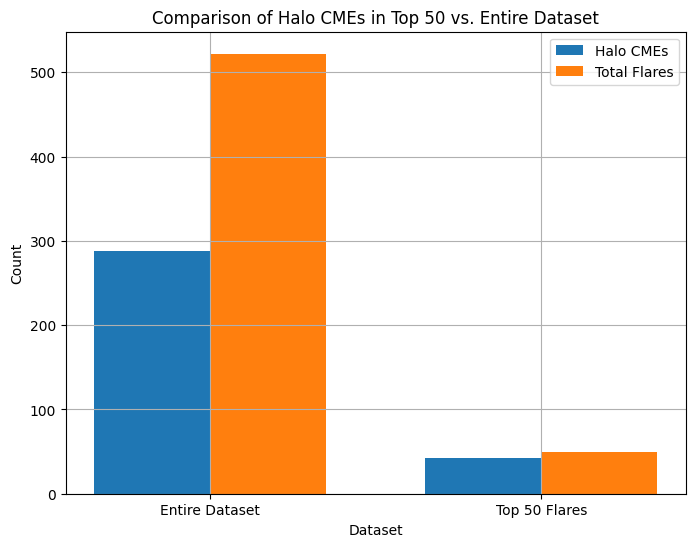

In [215]:
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Entire Dataset', 'Top 50 Flares']
halo_cmes_count = [total_halo.shape[0], top_50_halo.shape[0]]
total_flare_count = [df.shape[0], top_50_nasa.shape[0]]
bar_width = 0.35
index = range(len(labels))
bar1 = plt.bar(index, halo_cmes_count, bar_width, label='Halo CMEs')
bar2 = plt.bar([i + bar_width for i in index], total_flare_count, bar_width, label='Total Flares')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Comparison of Halo CMEs in Top 50 vs. Entire Dataset')
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.legend()
plt.grid(True)

We can see that in the top 50 flares barplot, the number of halo cme and the total number of flares are very close. However, when taken over the entire dtaset, the number o halo cme is just over half. Therefore, the top 50 flares are more likely to be halo.

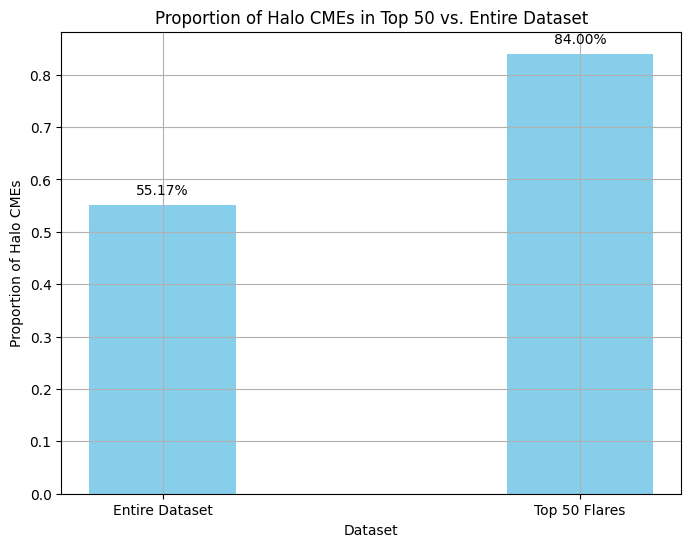

In [216]:
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Entire Dataset', 'Top 50 Flares']
halo_cmes_prop = total_halo.shape[0] / df.shape[0]
halo_cmes_prop_top_50 = top_50_halo.shape[0] / top_50_nasa.shape[0]
proportions = [halo_cmes_prop, halo_cmes_prop_top_50]
total_flare_count = [df.shape[0], top_50_nasa.shape[0]]
bar_width = 0.35
index = range(len(labels))
bars = plt.bar(index, proportions, bar_width, color='skyblue')
plt.xlabel('Dataset')
plt.ylabel('Proportion of Halo CMEs')
plt.title('Proportion of Halo CMEs in Top 50 vs. Entire Dataset')
plt.xticks(index, labels)
plt.grid(True)
for bar, proportion in zip(bars, proportions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{proportion:.2%}', ha='center')

plt.show()

Here we can see that in the entire dataset 55.17% of the data are Halos, while in the top 50, it is as high as 84%